In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')
print(train_data.shape, test_data.shape)
train_data.head()

(1460, 81) (1459, 80)


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [5]:
for i in train_data:
  if len(train_data[i]) != 1460:
    print(len(train_data[i]))

In [6]:
train_data2 = train_data
test_data2 = test_data

In [ ]:
print(train_data.dtypes.astype(str).value_counts())

object     43
int64      35
float64     3
dtype: int64


In [ ]:
print(train_data2.shape,' ',test_data2.shape)

(1460, 81)   (1459, 80)


In [ ]:
for i in train_data:
  if train_data[i].isnull().sum():
    print(i,' ',train_data[i].dtype,' ',train_data[i].isnull().sum())

LotFrontage   float64   259
Alley   object   1369
MasVnrType   object   8
MasVnrArea   float64   8
BsmtQual   object   37
BsmtCond   object   37
BsmtExposure   object   38
BsmtFinType1   object   37
BsmtFinType2   object   38
Electrical   object   1
FireplaceQu   object   690
GarageType   object   81
GarageYrBlt   float64   81
GarageFinish   object   81
GarageQual   object   81
GarageCond   object   81
PoolQC   object   1453
Fence   object   1179
MiscFeature   object   1406


In [7]:
train_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [8]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean(), inplace = True)
train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mean(), inplace = True)


In [9]:
mode = train_data['GarageYrBlt'].mode() 
mode[0]

2005.0

In [10]:
train_data["GarageYrBlt"].fillna(mode[0], inplace = True)

In [11]:
for i in train_data:
  if train_data[i].dtype == object:
    mode = train_data[i].mode()
    train_data[i].fillna(mode[0], inplace = True)
  else:
    mode = train_data[i].mean()
    train_data[i].fillna(mode, inplace = True)

In [ ]:
train_data.shape

(1460, 76)

In [12]:
for i in train_data:
  if train_data[i].dtype == object:
    print(i,' ',len(np.unique(train_data[i])),' ',train_data[i].dtype)

MSZoning   5   object
Street   2   object
LotShape   4   object
LandContour   4   object
Utilities   2   object
LotConfig   5   object
LandSlope   3   object
Neighborhood   25   object
Condition1   9   object
Condition2   8   object
BldgType   5   object
HouseStyle   8   object
RoofStyle   6   object
RoofMatl   8   object
Exterior1st   15   object
Exterior2nd   16   object
MasVnrType   4   object
ExterQual   4   object
ExterCond   5   object
Foundation   6   object
BsmtQual   4   object
BsmtCond   4   object
BsmtExposure   4   object
BsmtFinType1   6   object
BsmtFinType2   6   object
Heating   6   object
HeatingQC   5   object
CentralAir   2   object
Electrical   5   object
KitchenQual   4   object
Functional   7   object
GarageType   6   object
GarageFinish   3   object
GarageQual   5   object
GarageCond   5   object
PavedDrive   3   object
SaleType   9   object
SaleCondition   6   object


In [13]:
poke_df = train_data

In [14]:
gen_le = LabelEncoder()
for i in poke_df:
  if poke_df[i].dtype == object:
    gen_labels = gen_le.fit_transform(poke_df[i])
    train_data[i] = gen_labels

In [15]:
train_data.head(5)

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0   1          60         3  ...         8              4     208500
1   2          20         3  ...         8              4     181500
2   3          60         3  ...         8              4     223500
3   4          70         3  ...         8              0     140000
4   5          60         3  ...         8              4     250000

[5 rows x 76 columns]

In [16]:
train_data.describe()

Id   MSSubClass  ...  SaleCondition      SalePrice
count  1460.000000  1460.000000  ...    1460.000000    1460.000000
mean    730.500000    56.897260  ...       3.770548  180921.195890
std     421.610009    42.300571  ...       1.100854   79442.502883
min       1.000000    20.000000  ...       0.000000   34900.000000
25%     365.750000    20.000000  ...       4.000000  129975.000000
50%     730.500000    50.000000  ...       4.000000  163000.000000
75%    1095.250000    70.000000  ...       4.000000  214000.000000
max    1460.000000   190.000000  ...       5.000000  755000.000000

[8 rows x 76 columns]

In [17]:
train_data= train_data.drop('Id', axis = 1)

In [18]:
X = train_data.drop('SalePrice', axis = 1)
Y = train_data['SalePrice']

In [ ]:
X

MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
0             60         3         65.0  ...    2008         8              4
1             20         3         80.0  ...    2007         8              4
2             60         3         68.0  ...    2008         8              4
3             70         3         60.0  ...    2006         8              0
4             60         3         84.0  ...    2008         8              4
...          ...       ...          ...  ...     ...       ...            ...
1455          60         3         62.0  ...    2007         8              4
1456          20         3         85.0  ...    2010         8              4
1457          70         3         66.0  ...    2010         8              4
1458          20         3         68.0  ...    2010         8              4
1459          20         3         75.0  ...    2008         8              4

[1460 rows x 74 columns]

In [ ]:


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
3        LotArea  1.011497e+07
69       MiscVal  6.253332e+06
42      2ndFlrSF  4.648841e+05
32    BsmtFinSF1  3.999851e+05
68      PoolArea  3.835642e+05
34    BsmtFinSF2  3.688827e+05
24    MasVnrArea  2.857403e+05
35     BsmtUnfSF  2.747512e+05
43  LowQualFinSF  2.448810e+05
44     GrLivArea  1.968501e+05


In [ ]:

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)


[1.51669390e-02 8.98006706e-03 2.64318030e-02 2.83588695e-02
 2.77109285e-04 1.47629939e-02 7.20852326e-03 6.22814616e-05
 1.59404471e-02 3.55226413e-03 2.36585456e-02 8.50630060e-03
 8.48918115e-04 6.91262304e-03 1.28505959e-02 2.06730829e-02
 1.61448460e-02 2.66509456e-02 2.64225048e-02 1.18129240e-02
 1.27473216e-03 1.88505856e-02 2.04200883e-02 1.47850416e-02
 1.89841714e-02 8.95246842e-03 7.94332820e-03 1.14375618e-02
 1.13712334e-02 6.10069402e-03 1.75641142e-02 1.99278658e-02
 2.60371225e-02 6.91566025e-03 7.53581904e-03 2.94275315e-02
 2.75202116e-02 1.36023001e-03 1.60607187e-02 3.75060391e-03
 5.69627777e-03 2.94057554e-02 1.78466389e-02 1.26095889e-03
 2.94329771e-02 1.51048456e-02 4.42943499e-03 9.44672422e-03
 1.15010307e-02 1.66143588e-02 2.11420980e-03 1.26916121e-02
 2.37290384e-02 5.30937161e-03 1.57932295e-02 1.19462607e-02
 2.62118259e-02 1.39495693e-02 1.30766687e-02 2.88088678e-02
 3.23814275e-03 2.59406134e-03 4.78003886e-03 2.24116915e-02
 2.33619216e-02 8.846993

In [ ]:
train_data['Utilities']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Utilities, Length: 1460, dtype: int64

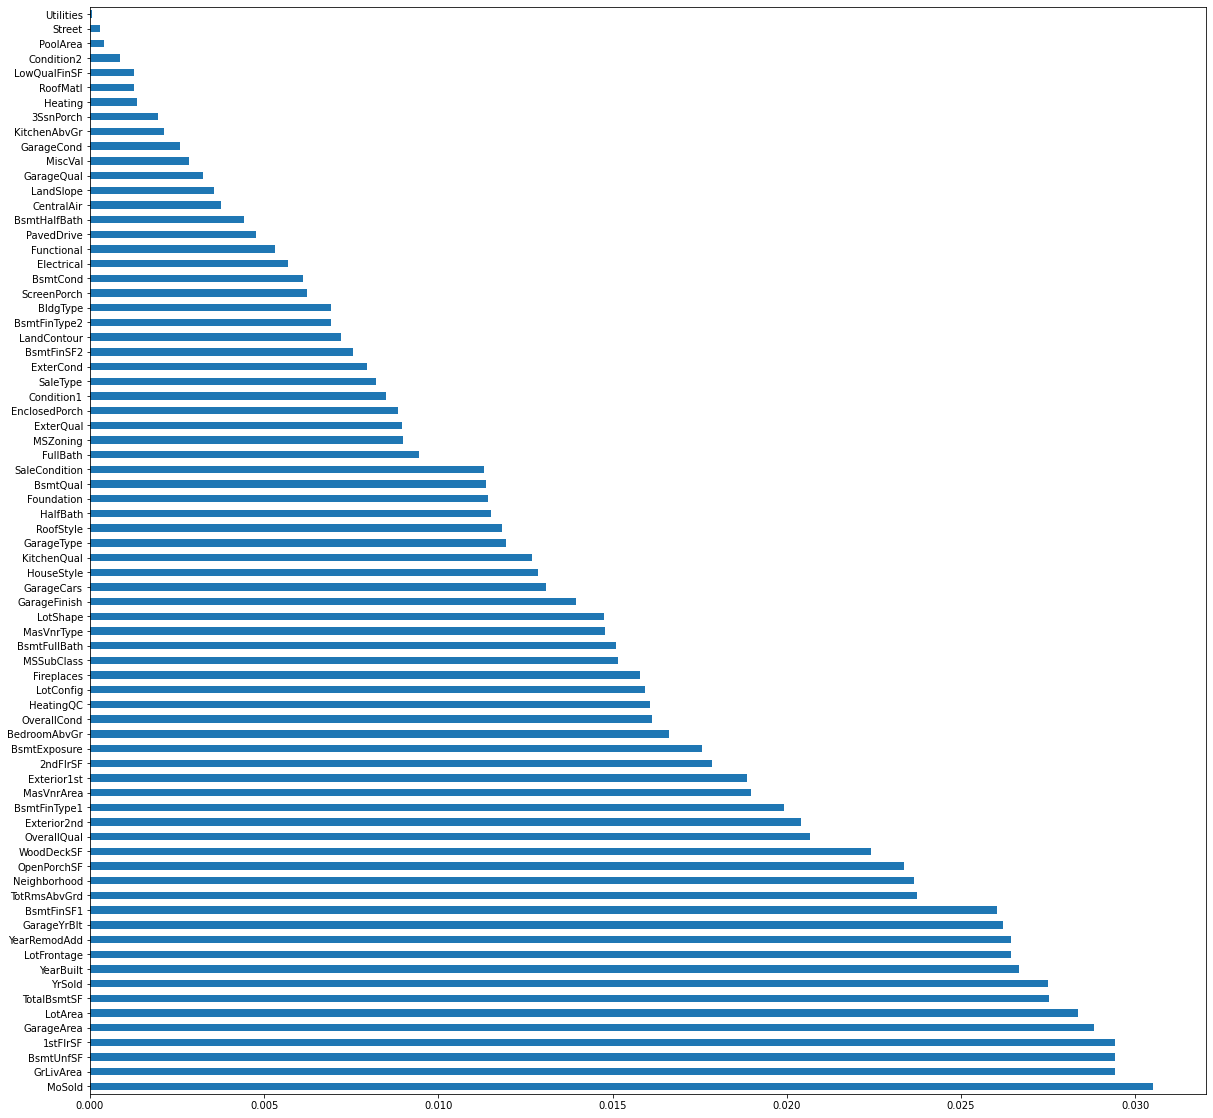

In [ ]:
plt.figure(figsize=(20, 20))
feat_importances.nlargest(76).plot(kind='barh')
plt.show()

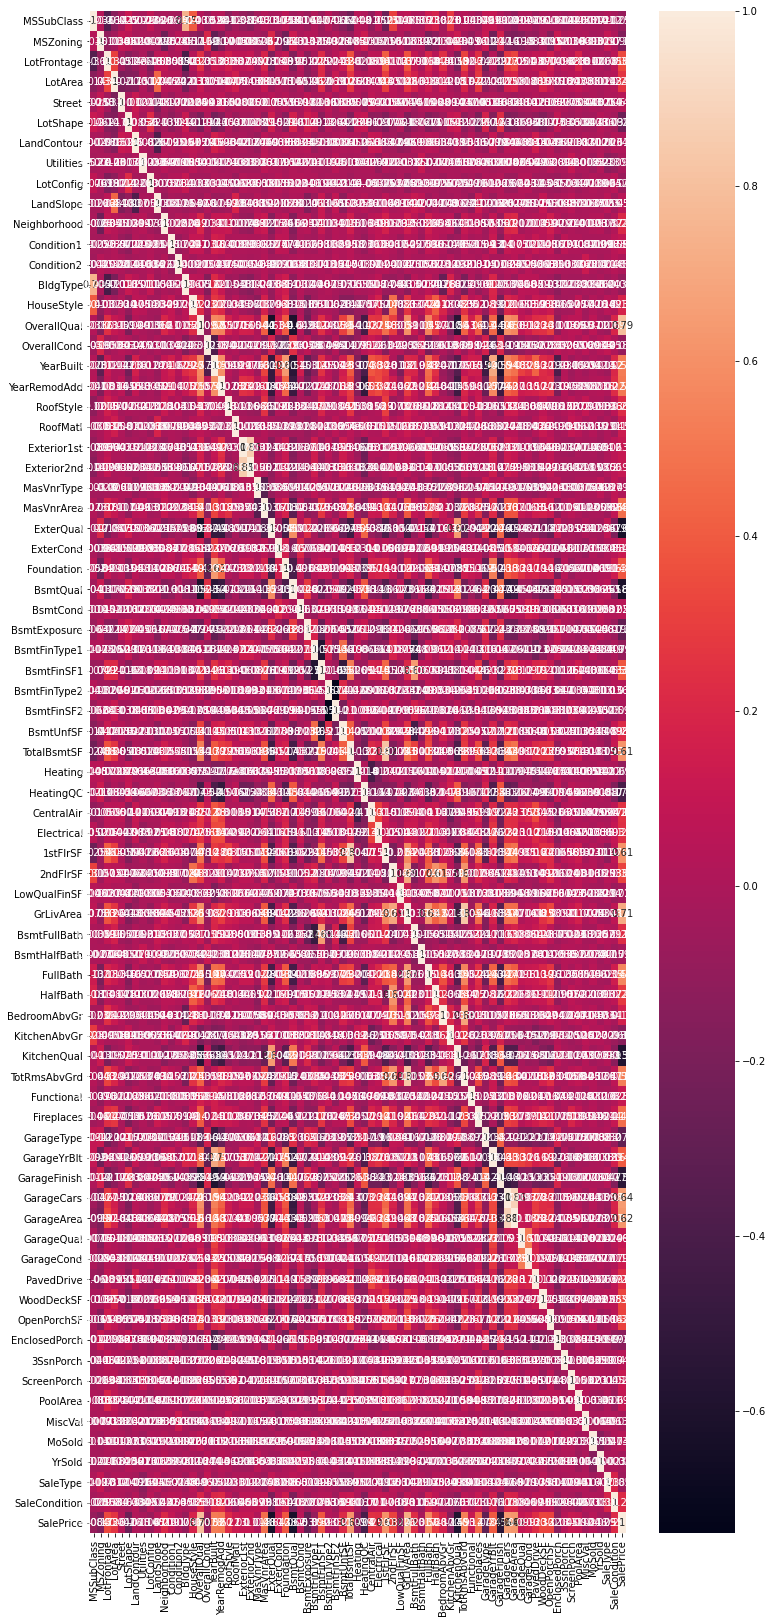

In [ ]:
plt.figure(figsize=(12, 28))

vg_corr = train_data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [ ]:
#plt.figure(figsize=(14, 14))

#sns.pairplot(train_data, diag_kind='kde');

In [19]:
x1 = train_data.drop('SalePrice', axis = 1)
y1 = train_data['SalePrice']

In [20]:
x1 = train_data.drop('SalePrice', axis = 1)

In [21]:
x = x1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
train_data1 = pd.DataFrame(x_train)

In [22]:
test_data = test_data2

In [23]:
test_data.shape

(1459, 80)

In [24]:
for i in test_data:
  if test_data[i].isnull().sum():
    print(i,' ',test_data[i].dtype,' ',test_data[i].isnull().sum())

MSZoning   object   4
LotFrontage   float64   227
Alley   object   1352
Utilities   object   2
Exterior1st   object   1
Exterior2nd   object   1
MasVnrType   object   16
MasVnrArea   float64   15
BsmtQual   object   44
BsmtCond   object   45
BsmtExposure   object   44
BsmtFinType1   object   42
BsmtFinSF1   float64   1
BsmtFinType2   object   42
BsmtFinSF2   float64   1
BsmtUnfSF   float64   1
TotalBsmtSF   float64   1
BsmtFullBath   float64   2
BsmtHalfBath   float64   2
KitchenQual   object   1
Functional   object   2
FireplaceQu   object   730
GarageType   object   76
GarageYrBlt   float64   78
GarageFinish   object   78
GarageCars   float64   1
GarageArea   float64   1
GarageQual   object   78
GarageCond   object   78
PoolQC   object   1456
Fence   object   1169
MiscFeature   object   1408
SaleType   object   1


In [25]:
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [26]:
mode = test_data['GarageYrBlt'].mode() 
mode[0]

2005.0

In [27]:
test_data["GarageYrBlt"].fillna(mode[0], inplace = True)

In [28]:
for i in test_data:
  if test_data[i].dtype == object:
    mode = test_data[i].mode()
    test_data[i].fillna(mode[0], inplace = True)
  else:
    mode = test_data[i].mean()
    test_data[i].fillna(mode, inplace = True)

In [29]:
for i in test_data:
  if test_data[i].dtype == object:
    print(i,' ',len(np.unique(test_data[i])),' ',test_data[i].dtype)

MSZoning   5   object
Street   2   object
LotShape   4   object
LandContour   4   object
Utilities   1   object
LotConfig   5   object
LandSlope   3   object
Neighborhood   25   object
Condition1   9   object
Condition2   5   object
BldgType   5   object
HouseStyle   7   object
RoofStyle   6   object
RoofMatl   4   object
Exterior1st   13   object
Exterior2nd   15   object
MasVnrType   4   object
ExterQual   4   object
ExterCond   5   object
Foundation   6   object
BsmtQual   4   object
BsmtCond   4   object
BsmtExposure   4   object
BsmtFinType1   6   object
BsmtFinType2   6   object
Heating   4   object
HeatingQC   5   object
CentralAir   2   object
Electrical   4   object
KitchenQual   4   object
Functional   7   object
GarageType   6   object
GarageFinish   3   object
GarageQual   4   object
GarageCond   5   object
PavedDrive   3   object
SaleType   9   object
SaleCondition   6   object


In [30]:
test_data

MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0             20       RH         80.0  ...    2010       WD        Normal
1             20       RL         81.0  ...    2010       WD        Normal
2             60       RL         74.0  ...    2010       WD        Normal
3             60       RL         78.0  ...    2010       WD        Normal
4            120       RL         43.0  ...    2010       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
1454         160       RM         21.0  ...    2006       WD        Normal
1455         160       RM         21.0  ...    2006       WD       Abnorml
1456          20       RL        160.0  ...    2006       WD       Abnorml
1457          85       RL         62.0  ...    2006       WD        Normal
1458          60       RL         74.0  ...    2006       WD        Normal

[1459 rows x 74 columns]

In [32]:
td = test_data

In [33]:
c = 0 #GarageFinish
for i in td['MSSubClass']:
  if type(i) == int:
    #test_data ['GarageYrBlt'][i] = 2005
    #print(i)
    c+=1
#td.loc[(td['GarageFinish']==0) ] = 'Unf'
print(c)

1459


In [34]:
test_data['GarageFinish'].mode()

0    Unf
dtype: object

In [35]:
poke_df = test_data

In [36]:
test_data= test_data.drop('Id', axis = 1)

KeyError: ignored

In [37]:

gen_le = LabelEncoder()
for i in poke_df:
  if poke_df[i].dtype == object:
    print(i)
    gen_labels = gen_le.fit_transform(poke_df[i])
    test_data[i] = gen_labels

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [38]:
test_data1.head()

NameError: ignored

In [39]:
x = test_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
test_data1 = pd.DataFrame(x_train)

In [40]:
print(train_data1.shape,' ',test_data1.shape)

(1460, 74)   (1459, 74)


In [41]:
test_y1 = test_dataY.drop('Id', axis = 1)

In [42]:
test_y1

SalePrice
0     169277.052498
1     187758.393989
2     183583.683570
3     179317.477511
4     150730.079977
...             ...
1454  167081.220949
1455  164788.778231
1456  219222.423400
1457  184924.279659
1458  187741.866657

[1459 rows x 1 columns]

In [63]:
X = train_data.drop(['SalePrice'],axis=1)
#test1 = test[X.columns]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = np.array(train_data['SalePrice']).reshape(-1,1)
#y = sc.fit_transform(y)

In [64]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
regressor.score(X_train, y_train)

0.8847836228520329

In [67]:
y_pred = regressor.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [69]:
a = mean_squared_error(y_test, y_pred)

In [70]:
rmse = a**0.5
rmse

45146.11699373709

In [71]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressorTree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressorTree.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [72]:
regressorTree.score(X_train, y_train)

1.0

In [73]:
y_pred_tree = regressor.predict(X_test)

In [74]:
DTRrmse = (mean_squared_error(y_test, y_pred_tree))**0.5
DTRrmse

45146.11699373709

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

regressorGB = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=10,
    learning_rate=0.8
)
regressorGB.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.8, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressorGB.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [77]:
regressorGB.score(X_train, y_train)

0.9796448725030037

In [78]:
y_predGB = regressorGB.predict(X_test)

In [79]:
GBrmse = (mean_squared_error(y_test, y_predGB))**0.5

GBrmse

34814.08737019847

In [60]:
predictions = regressorGB.predict(test_data1)

In [ ]:
predictions_transform = sc.inverse_transform(predictions)

In [ ]:
predictions_transform

array([177722.31758133, 168898.61460166, 168898.61460166, ...,
       171841.92342418, 163328.40025487, 166271.70907739])

In [80]:
pred_y = regressorTree.predict(test_data1)
pred_y = pred_y.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/regressorTree.csv", index=False)

In [ ]:
train = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')

In [ ]:
print("\n TRAIN FILE \n")
display(train.head())
print("\n TEST FILE \n")
display(test.head())


 TRAIN FILE 



Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


 TEST FILE 



Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
print("\n TRAIN FILE \n")
display(train.shape)
print("\n TEST FILE \n")
display(test.shape)


 TRAIN FILE 



(1460, 81)


 TEST FILE 



(1459, 80)

In [ ]:
print("\n TRAIN FILE \n")
display(train.describe())
print("\n TEST FILE \n")
display(test.describe())


 TRAIN FILE 



Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


 TEST FILE 



Id   MSSubClass  ...       MoSold       YrSold
count  1459.000000  1459.000000  ...  1459.000000  1459.000000
mean   2190.000000    57.378341  ...     6.104181  2007.769705
std     421.321334    42.746880  ...     2.722432     1.301740
min    1461.000000    20.000000  ...     1.000000  2006.000000
25%    1825.500000    20.000000  ...     4.000000  2007.000000
50%    2190.000000    50.000000  ...     6.000000  2008.000000
75%    2554.500000    70.000000  ...     8.000000  2009.000000
max    2919.000000   190.000000  ...    12.000000  2010.000000

[8 rows x 37 columns]

In [ ]:
print("\n TRAIN FILE \n")
display(train.columns)
print("\n TEST FILE \n")
display(test.columns)


 TRAIN FILE 



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive


 TEST FILE 



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print("\n TRAIN FILE \n")
display(train.isnull().sum())
print("\n TEST FILE \n")
display(test.isnull().sum())


 TRAIN FILE 



Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


 TEST FILE 



Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
def missing_data_percentage(a):
    total = a.isnull().sum().sort_values(ascending=False)
    percent = (a.isnull().sum()/a.isnull().count()).sort_values(ascending=False)
    b = pd.concat([total, percent], axis=1, keys=['Total NULL values', 'Percentage'])
    return b

print("\n TRAIN FILE \n")
display(missing_data_percentage(train))
print("\n TEST FILE \n")
display(missing_data_percentage(test))


 TRAIN FILE 



Total NULL values  Percentage
PoolQC                      1453    0.995205
MiscFeature                 1406    0.963014
Alley                       1369    0.937671
Fence                       1179    0.807534
FireplaceQu                  690    0.472603
...                          ...         ...
CentralAir                     0    0.000000
SaleCondition                  0    0.000000
Heating                        0    0.000000
TotalBsmtSF                    0    0.000000
Id                             0    0.000000

[81 rows x 2 columns]


 TEST FILE 



Total NULL values  Percentage
PoolQC                    1456    0.997944
MiscFeature               1408    0.965045
Alley                     1352    0.926662
Fence                     1169    0.801234
FireplaceQu                730    0.500343
...                        ...         ...
Electrical                   0    0.000000
CentralAir                   0    0.000000
HeatingQC                    0    0.000000
Foundation                   0    0.000000
Id                           0    0.000000

[80 rows x 2 columns]

In [ ]:
a = missing_data_percentage(train)

Text(0.5, 1.0, 'Percent missing data by feature')

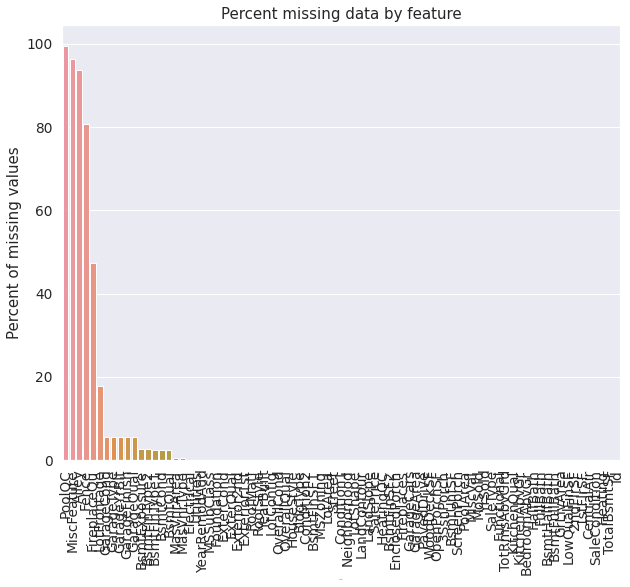

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=a.index, y=a['Percentage']*100)
plt.xlabel('Features', fontsize=1)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
print("\n TRAIN FILE \n")
display(train.dtypes)
print("\n TEST FILE \n")
display(test.dtypes)


 TRAIN FILE 



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


 TEST FILE 



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [ ]:
print("\n Description \n")
display(train['SalePrice'].describe())


 Description 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

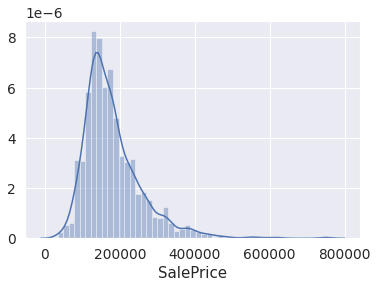

In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
print("Skewness Value:",train['SalePrice'].skew())
print("Kurtosis value:", train['SalePrice'].kurt())

Skewness Value: 1.8828757597682129
Kurtosis value: 6.536281860064529


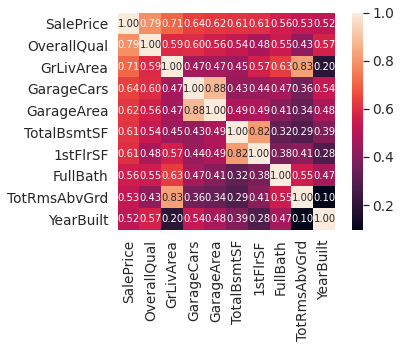

In [ ]:
corrmat = train.corr()
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

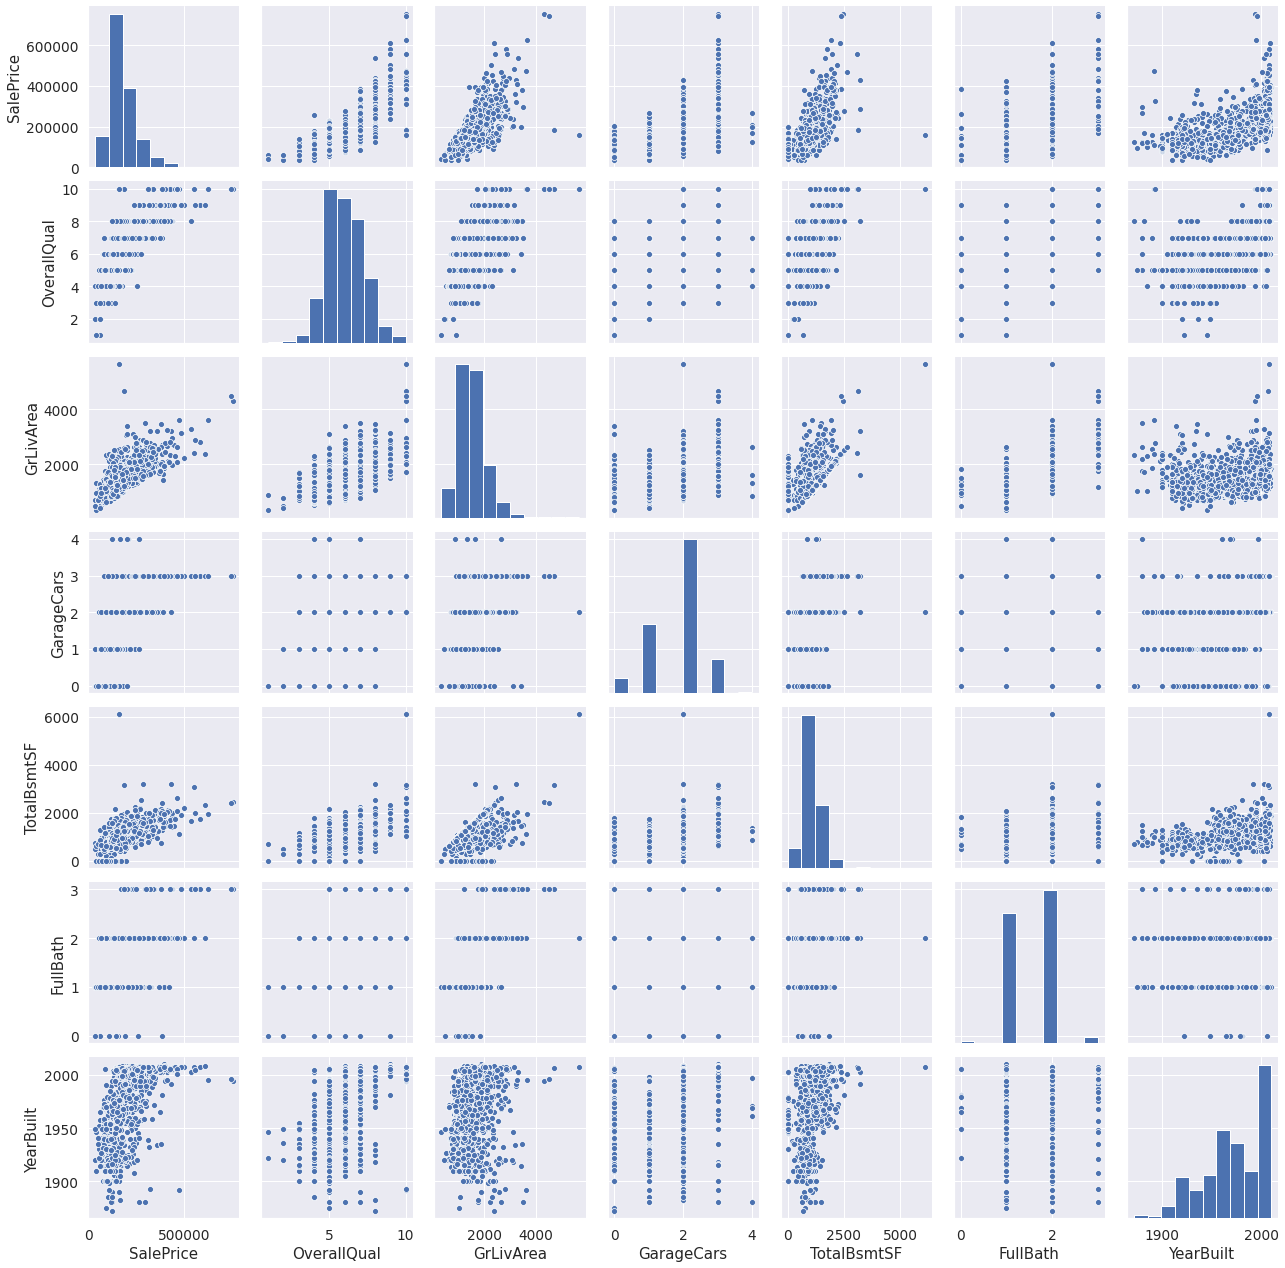

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

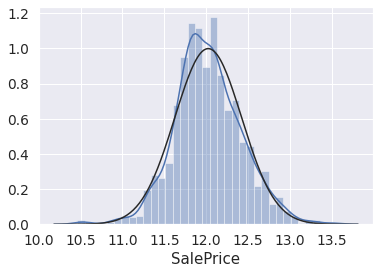

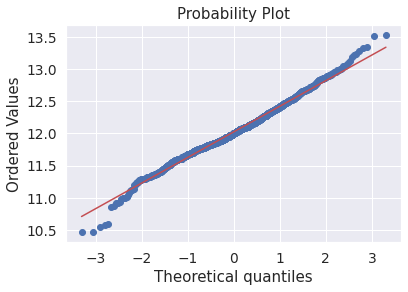

In [ ]:
sns.distplot(np.log(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

In [ ]:
tr = train

In [ ]:
train = tr

In [ ]:
train

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [ ]:
def preprocess(df):
    print('A: ',df.shape)
    df.dropna(inplace=True, axis=1)
    print('A: ',df.shape)
    df.reset_index(inplace=True,drop=True)
    object_type_columns = df.select_dtypes(include=['object']).columns
    print("Object_Type_Columns:\n",object_type_columns)
    display("Top 10 most affecting factors")
    corrmat = train.corr()
    k = 10
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
    cm = np.corrcoef(train[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    display('Before Label Encoding Dataframe')
    display(df)
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    for i in object_type_columns:
        df[i] = le.fit_transform(df[i])
    display('Making Data ready for Fitting in Model')
    return df

A:  (1460, 81)
A:  (1460, 62)
Object_Type_Columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


'Top 10 most affecting factors'

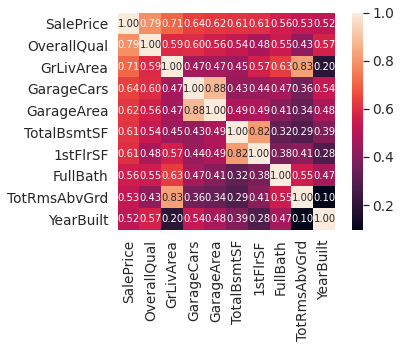

'Before Label Encoding Dataframe'

Id  MSSubClass MSZoning  ...  SaleType SaleCondition SalePrice
0        1          60       RL  ...        WD        Normal    208500
1        2          20       RL  ...        WD        Normal    181500
2        3          60       RL  ...        WD        Normal    223500
3        4          70       RL  ...        WD       Abnorml    140000
4        5          60       RL  ...        WD        Normal    250000
...    ...         ...      ...  ...       ...           ...       ...
1455  1456          60       RL  ...        WD        Normal    175000
1456  1457          20       RL  ...        WD        Normal    210000
1457  1458          70       RL  ...        WD        Normal    266500
1458  1459          20       RL  ...        WD        Normal    142125
1459  1460          20       RL  ...        WD        Normal    147500

[1460 rows x 62 columns]

'Making Data ready for Fitting in Model'

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0        1          60         3  ...         8              4     208500
1        2          20         3  ...         8              4     181500
2        3          60         3  ...         8              4     223500
3        4          70         3  ...         8              0     140000
4        5          60         3  ...         8              4     250000
...    ...         ...       ...  ...       ...            ...        ...
1455  1456          60         3  ...         8              4     175000
1456  1457          20         3  ...         8              4     210000
1457  1458          70         3  ...         8              4     266500
1458  1459          20         3  ...         8              4     142125
1459  1460          20         3  ...         8              4     147500

[1460 rows x 62 columns]

In [ ]:
preprocess(train)